In [1]:
from __future__ import print_function
import tensorflow as tf
import os
import numpy as np
import pandas as pd
from common.PlotHelper import plotLossfunctionPerEpochs, plotScatterWithAxis
from neuralNetwork.KerasModelHelper import *
import random

basePath = "../service"
dataPath = "../data/"
sampleSize = None

#Trainer parameters
epochs = 20
batch_size = 21
valid_set_size = 0.05
test_set_size = 0.05

outputPath = "../output/own/NeuralNetwork/20Epoch"
model_version = 'aparent'

def getDirection(row):
    return row.split(':')[2]

Set size = 50000
Training set size = 45000
Validation set size = 2500
Test set size = 2500
Epoch 1/20
2142/2142 [==============================] - 68s 31ms/step - loss: 0.0406 - val_loss: 0.0280
Epoch 2/20
2142/2142 [==============================] - 62s 29ms/step - loss: 0.0290 - val_loss: 0.0248
Epoch 3/20
2142/2142 [==============================] - 61s 28ms/step - loss: 0.0247 - val_loss: 0.0248
Epoch 4/20
2142/2142 [==============================] - 60s 28ms/step - loss: 0.0214 - val_loss: 0.0252
Epoch 5/20
2142/2142 [==============================] - 60s 28ms/step - loss: 0.0185 - val_loss: 0.0240
Epoch 6/20
2142/2142 [==============================] - 61s 29ms/step - loss: 0.0152 - val_loss: 0.0253
Epoch 7/20
2142/2142 [==============================] - 60s 28ms/step - loss: 0.0122 - val_loss: 0.0238
Epoch 8/20
2142/2142 [==============================] - 61s 29ms/step - loss: 0.0103 - val_loss: 0.0246
Epoch 9/20
2142/2142 [==============================] - 60s 28ms/step - loss:

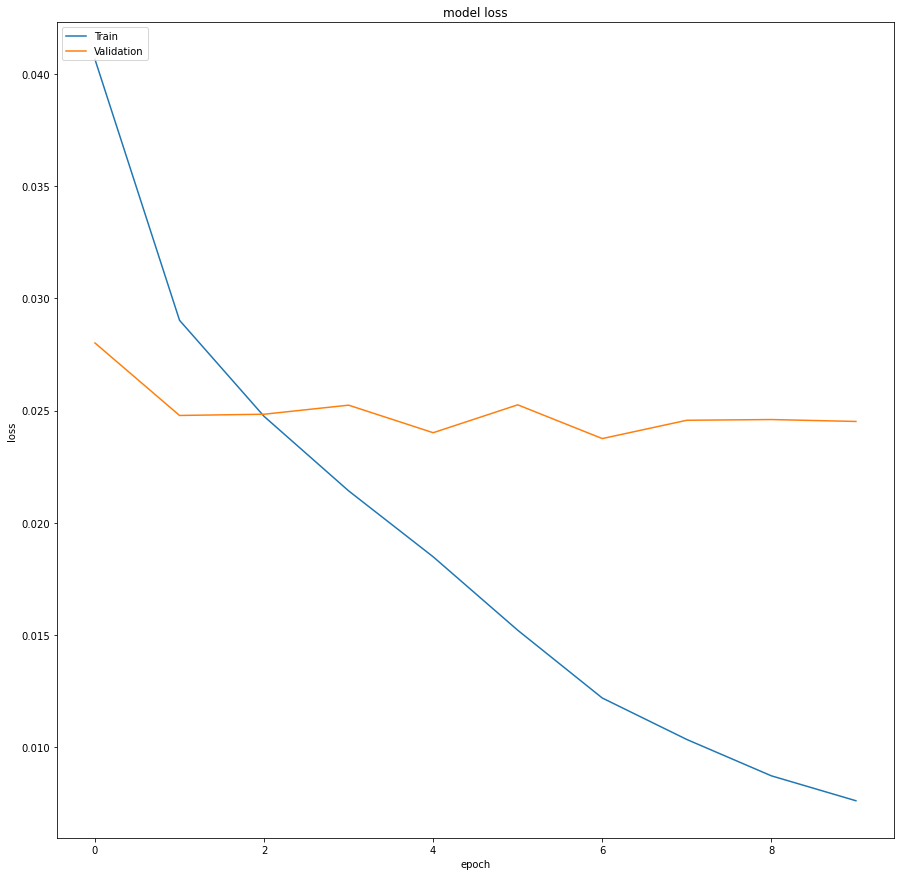

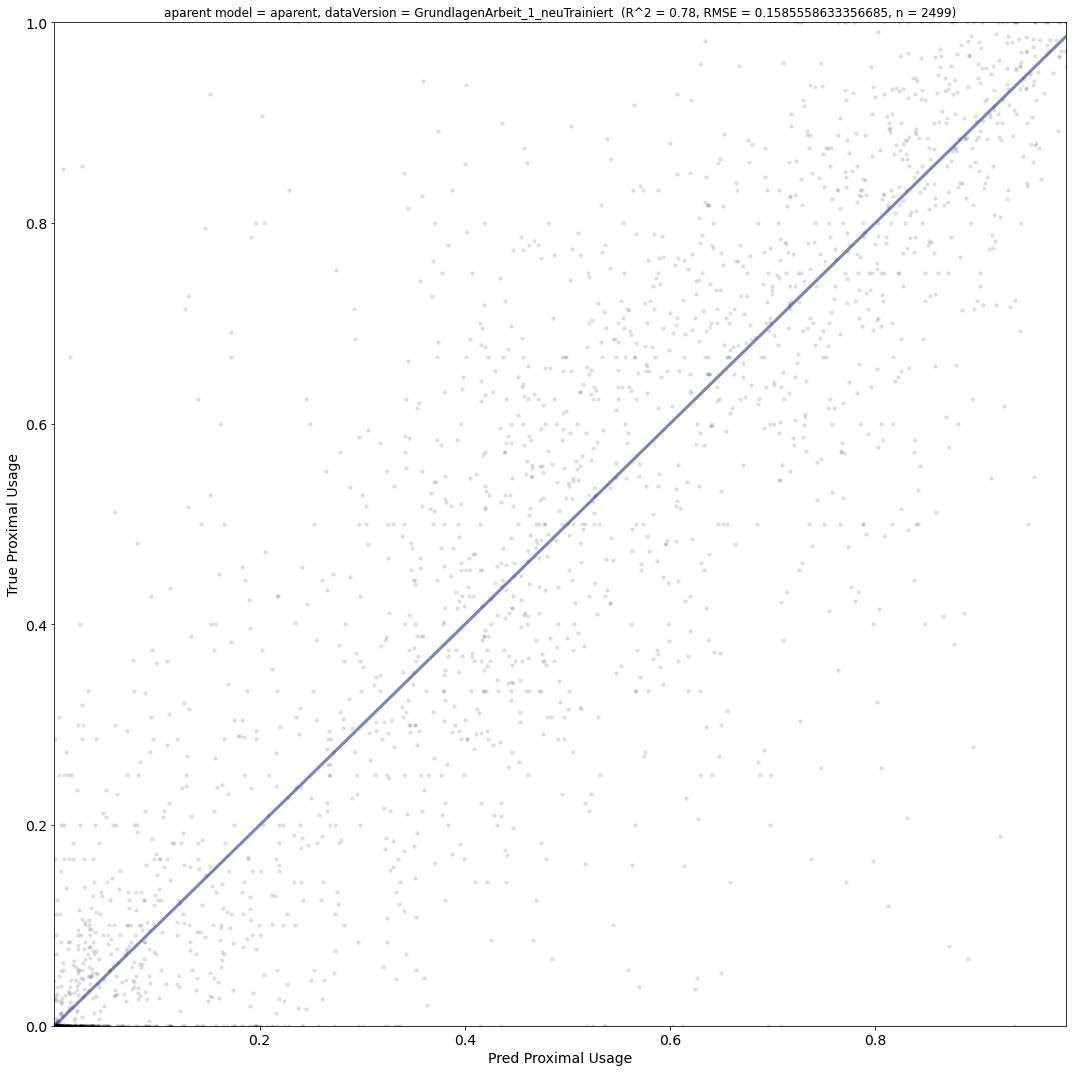

In [2]:
from neuralNetwork.dataProvider_grundlage import *
from neuralNetwork.aparent_data_plasmid_grundlage import *
from neuralNetwork.aparent_model_plasmid_large_lessdropout import *

data_version = 'GrundlagenArbeit_1_neuTrainiert'
seq_startpos=180
seq_length=205
sampleSize = 50000

filePath = os.path.join(dataPath, 'apa_plasmid_data')
data = load(filePath)

datagenerator = load_data_prediction(data=data, seq_length=seq_length, seq_startpos=seq_startpos, batch_size=batch_size, valid_set_size=valid_set_size, test_set_size=test_set_size, sampleSize=sampleSize)

model_prefix, model = load_aparent_model_Plasmid(seq_length=seq_length)
model = LoadAndTrain(data=datagenerator, model_prefix=model_prefix, model=model, output_Path=outputPath, model_version=model_version, data_version=data_version, epochs=epochs)
# model = loadModel(outputPath + '/saved_models/aparent_plasmid_iso_cut_distalpas_large_lessdropout_aparent.h5')
predict(model, datagenerator, outputPath, model_version, data_version)

In [3]:
# from neuralNetwork.dataProvider import *
# from neuralNetwork.aparent_data_plasmid_test import *

# data_version = 'GrundlagenArbeit_1'
# seq_startpos=180
# seq_length=205
# sampleSize = 500000
# outputPath = "../output/own/NeuralNetwork/{}".format(data_version)

# filePath = os.path.join(dataPath, 'apa_plasmid_data')
# data = load(filePath)

# datagenerator = load_data_prediction(data=data, seq_length=seq_length, seq_startpos=seq_startpos, batch_size=batch_size, valid_set_size=valid_set_size, test_set_size=test_set_size, sampleSize=sampleSize)

# model = loadModel('../output/aparent_plasmid_iso_cut_distalpas_large_lessdropout_all_libs_no_sampleweights.h5')
# predict(model, datagenerator, outputPath, model_version, data_version)

Set size = 84745
Training set size = 76271
Validation set size = 4237
Test set size = 4237
Epoch 1/20
3631/3631 [==============================] - 209s 58ms/step - loss: 0.0470 - val_loss: 0.0440
Epoch 2/20
3631/3631 [==============================] - 196s 54ms/step - loss: 0.0401 - val_loss: 0.0398
Epoch 3/20
3631/3631 [==============================] - 196s 54ms/step - loss: 0.0343 - val_loss: 0.0398
Epoch 4/20
3631/3631 [==============================] - 196s 54ms/step - loss: 0.0286 - val_loss: 0.0376
Epoch 5/20
3631/3631 [==============================] - 197s 54ms/step - loss: 0.0204 - val_loss: 0.0391
Epoch 6/20
3631/3631 [==============================] - 196s 54ms/step - loss: 0.0121 - val_loss: 0.0399
Epoch 7/20
3631/3631 [==============================] - 201s 55ms/step - loss: 0.0071 - val_loss: 0.0397
Saved trained model at ../output/own/NeuralNetwork/20Epoch\saved_models\aparent_plasmid_iso_cut_distalpas_large_lessdropout_aparent_Datenset1.h5 


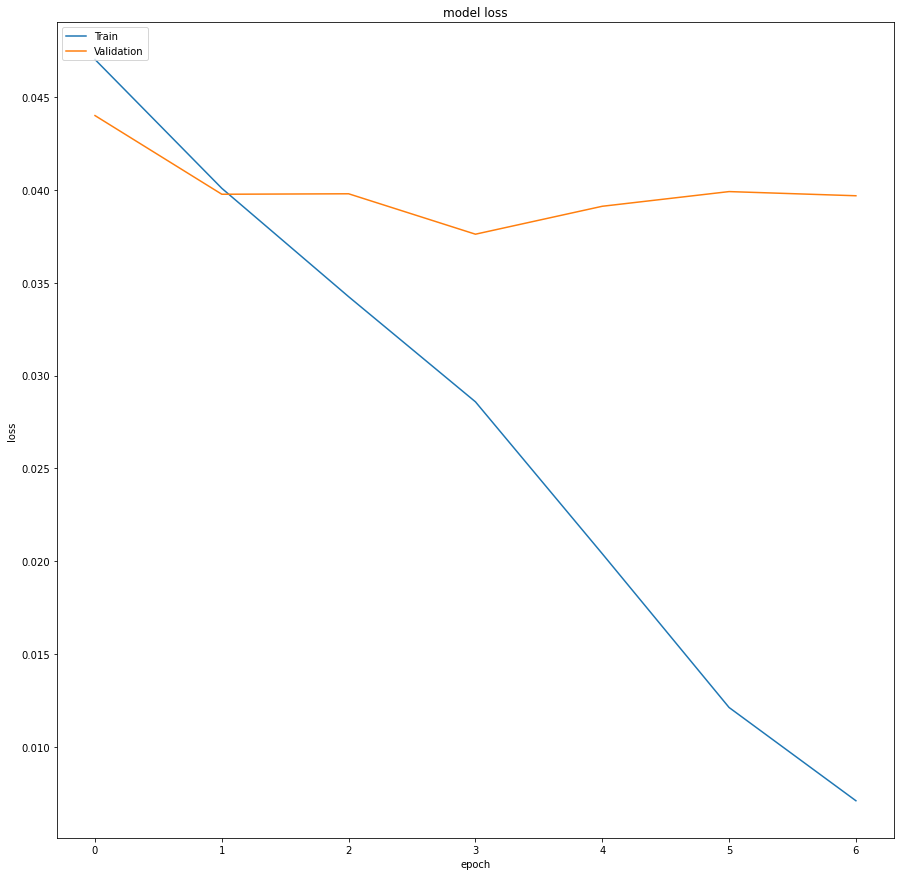

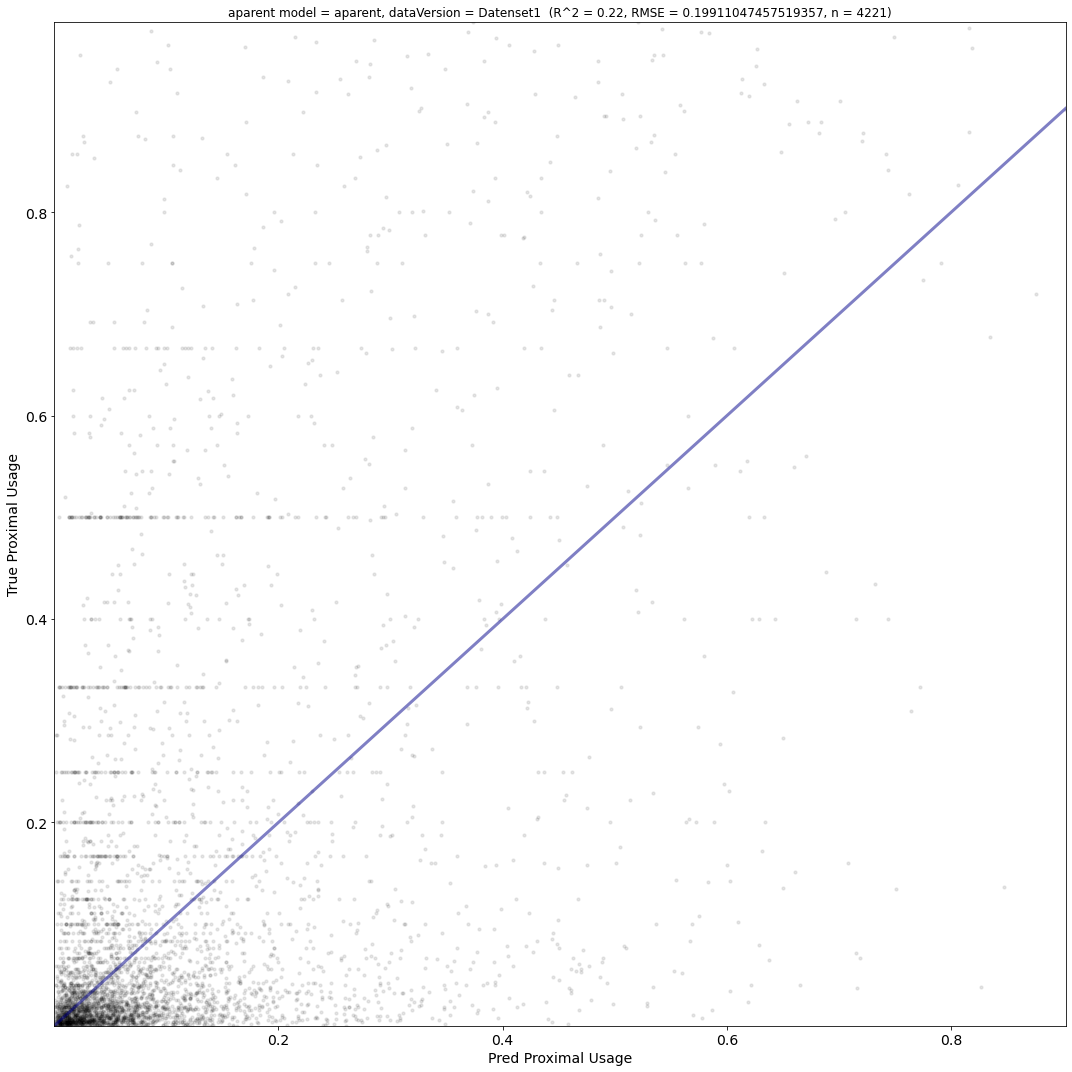

In [5]:
from neuralNetwork.aparent_data_plasmid_datenset import *
from neuralNetwork.aparent_model_plasmid_large_lessdropout import *

data_version = 'Datenset1'
file_name='input_ML_tabula_Muris_modified.csv'

sampleSize = None
seq_length = 400
seq_startpos = 0

filePath = os.path.join(dataPath, file_name)
data = pd.read_csv(filePath, sep=",")

datagenerator = load_data_prediction(data=data, seq_length=seq_length, seq_startpos=seq_startpos, batch_size=batch_size, valid_set_size=valid_set_size, test_set_size=test_set_size, sampleSize=sampleSize)

model_prefix, model = load_aparent_model_Plasmid_withoutLibrary(seq_length=seq_length)
model = LoadAndTrain(data=datagenerator, model_prefix=model_prefix, model=model, output_Path=outputPath, model_version=model_version, data_version=data_version, epochs=epochs)
predict(model, datagenerator, outputPath, model_version, data_version)

In [ ]:
# from neuralNetwork.aparent_data_plasmid_datenset import *
# from neuralNetwork.aparent_model_plasmid_large_lessdropout import *
# data_version = 'Datenset1_VordatenTrainiert'
# file_name='input_ML_tabula_Muris_modified.csv'
# filePath = os.path.join(dataPath, file_name)
# data = pd.read_csv(filePath, sep=",")

# seq_length = 205
# seq_startpos = 100

# datagenerator = load_data_prediction(data=data, seq_length=seq_length, seq_startpos=seq_startpos, batch_size=batch_size, valid_set_size=valid_set_size, test_set_size=test_set_size, sampleSize=sampleSize)


# plasmid_model = loadModel('../output/aparent_plasmid_iso_cut_distalpas_large_lessdropout_all_libs_no_sampleweights.h5')
# predict(model, datagenerator, outputPath, model_version, data_version)

Set size = 25872
Training set size = 23285
Validation set size = 1294
Test set size = 1293
Epoch 1/20
1108/1108 [==============================] - 62s 55ms/step - loss: 0.1283 - val_loss: 0.1231
Epoch 2/20
1108/1108 [==============================] - 60s 54ms/step - loss: 0.1100 - val_loss: 0.1063
Epoch 3/20
1108/1108 [==============================] - 59s 53ms/step - loss: 0.1017 - val_loss: 0.1026
Epoch 4/20
1108/1108 [==============================] - 59s 53ms/step - loss: 0.0911 - val_loss: 0.1126
Epoch 5/20
1108/1108 [==============================] - 59s 53ms/step - loss: 0.0738 - val_loss: 0.1241
Epoch 6/20
1108/1108 [==============================] - 59s 53ms/step - loss: 0.0452 - val_loss: 0.1238
Saved trained model at ../output/own/NeuralNetwork/20Epoch\saved_models\aparent_plasmid_iso_cut_distalpas_large_lessdropout_aparent_Datenset2.h5 


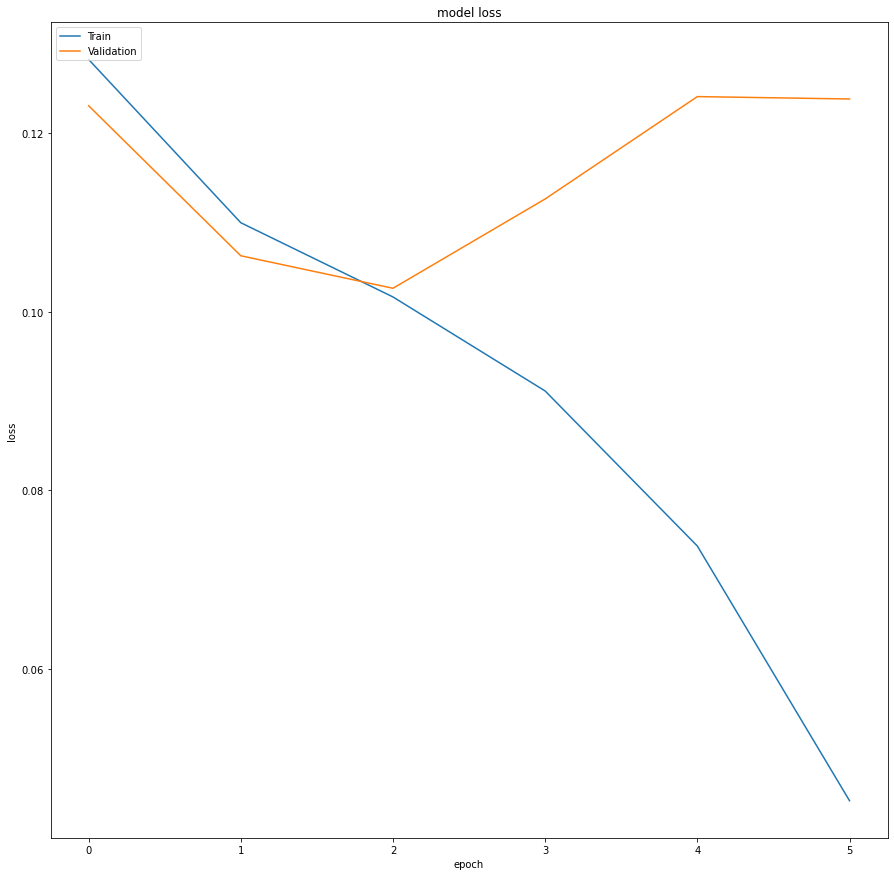

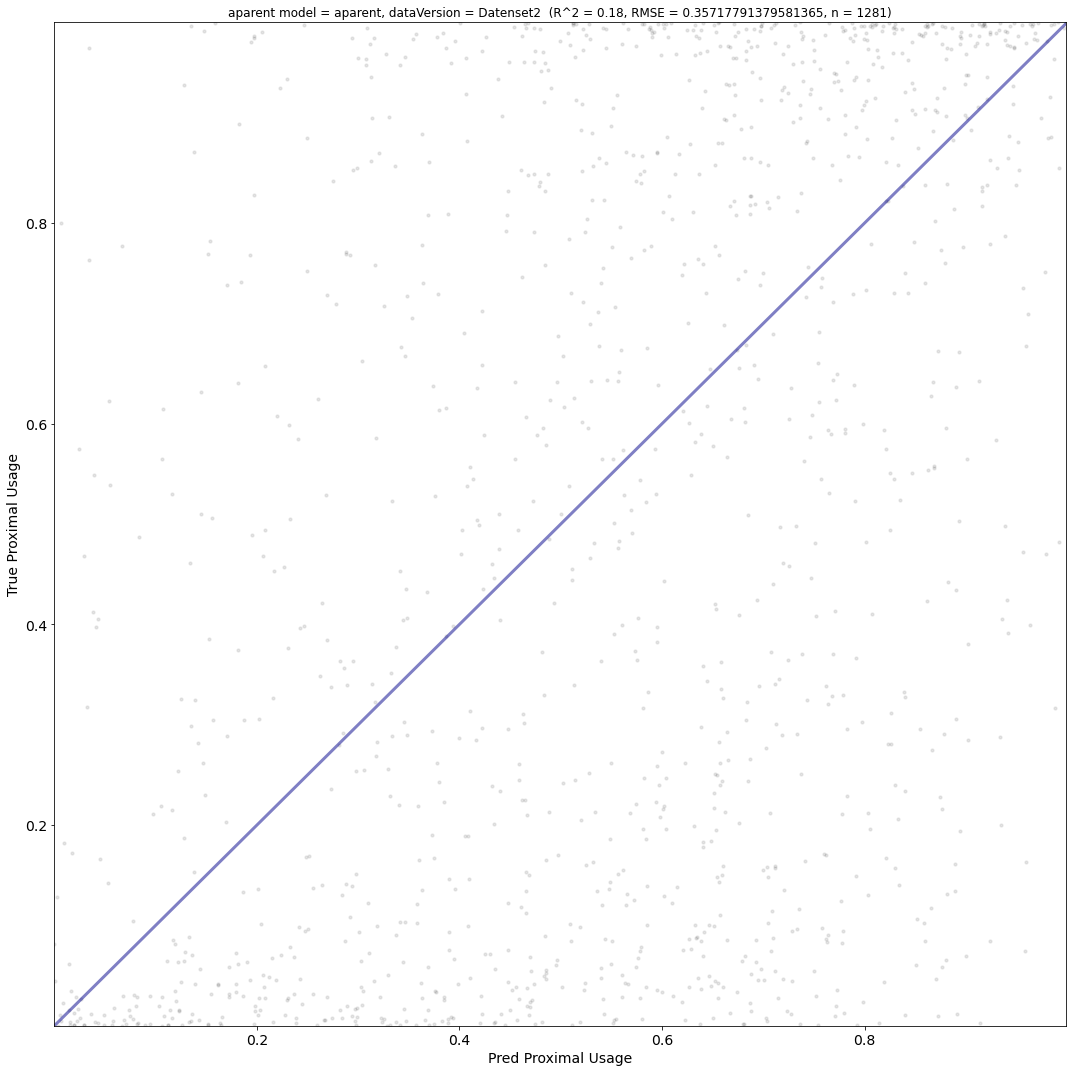

In [6]:
from neuralNetwork.aparent_data_plasmid_datenset import *
from neuralNetwork.aparent_model_plasmid_large_lessdropout import *

data_version = 'Datenset2'
file_name='prox_dist_pas_relUsage_flanks.hg38.tsv'
sampleSize=None
seq_length = 400
seq_startpos = 0

filePath = os.path.join(dataPath, file_name)
data = pd.read_csv(filePath, sep="\t")

proxData = pd.DataFrame()
proxData['sequence'] = data['upstream_prox'] + data['downstream_prox']
proxData['frequency'] =  data['usage_prox']
proxData['direction'] = data['id_prox'].apply(getDirection)

distData = pd.DataFrame()
distData['sequence'] = data['upstream_dist'] + data['downstream_dist']
distData['frequency'] = data['usage_dist']
distData['direction'] = data['id_prox'].apply(getDirection)

datacopy = pd.concat([proxData, distData])

datagenerator = load_data_prediction(data=datacopy, seq_length=seq_length, seq_startpos=seq_startpos, batch_size=batch_size, valid_set_size=valid_set_size, test_set_size=test_set_size, sampleSize=sampleSize)

model_prefix, model = load_aparent_model_Plasmid_withoutLibrary(seq_length=seq_length)
model = LoadAndTrain(data=datagenerator, model_prefix=model_prefix, model=model, output_Path=outputPath, model_version=model_version, data_version=data_version, epochs=epochs)
predict(model, datagenerator, outputPath, model_version, data_version)